In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy.stats import ttest_ind, chi2_contingency,chi2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [3]:
matplotlib.rcParams['figure.figsize'] = [10,8]
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.size'] = 15

In [4]:
# read the dataset

df = pd.read_csv("Bank Customer Churn Prediction.csv")
df.shape

(10000, 12)

### Exploratory Data Analysis

##### Exploratory Data Analysis (EDA) is usually the first step of any Data Science project, carried out before any Machine Learning models are built. Its goal is to take a look at the raw data that we get, explore it, and gather insights from it that can not only help us make our models better after-hand, but also provide relevant business information derived from this data. It is important to look deep into our data, so that we can tell a story using it.

In [5]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [7]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<AxesSubplot:ylabel='None'>

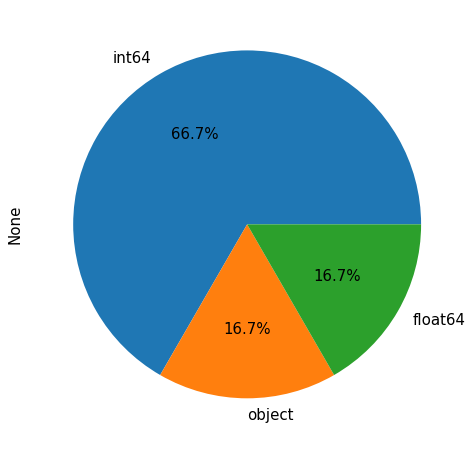

In [8]:
df.dtypes.value_counts().plot.pie(autopct='%1.1f%%')

In [9]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

##### There are no null values

In [10]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [11]:
# Deleting the customer_id column
df.drop('customer_id',axis=1,inplace=True)

#### Exploratory Data Analysis

<AxesSubplot:>

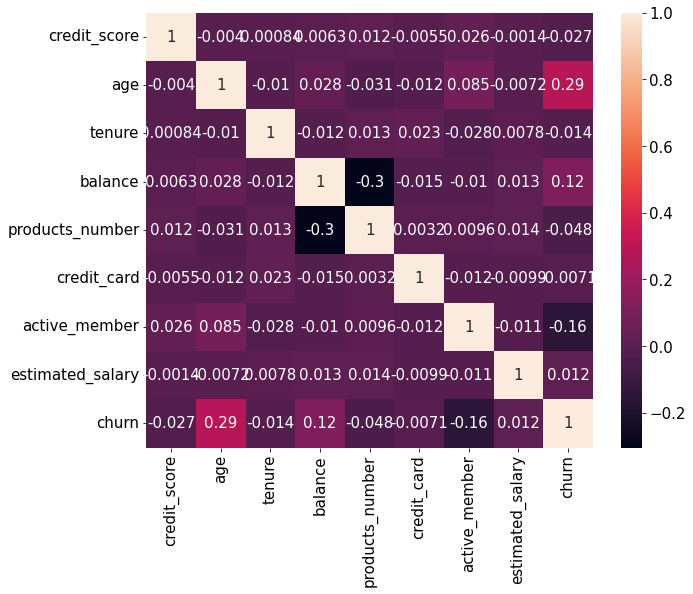

In [12]:
sn.heatmap(df.corr(),annot=True)

##### Features show no strong correlation and mainly they show negative correlation towards the target variable.

In [13]:
# Categorical feature list
cat_col = ['country', 'gender','products_number', 'credit_card','tenure', 'active_member','churn']

In [14]:
# Numerical feature list

num_col = ['balance','credit_score','estimated_salary','age']

In [15]:
df.churn.value_counts()

0    7963
1    2037
Name: churn, dtype: int64

##### Imbalance in the dataset.

In [16]:
df.country.value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

###### More than 50% of the customers are from France.

In [17]:
df.gender.value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [18]:
df.products_number.value_counts()

1    5084
2    4590
3     266
4      60
Name: products_number, dtype: int64

In [19]:
df.credit_card.value_counts()

1    7055
0    2945
Name: credit_card, dtype: int64

In [20]:
df.active_member.value_counts()

1    5151
0    4849
Name: active_member, dtype: int64

In [21]:
df.tenure.value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: tenure, dtype: int64

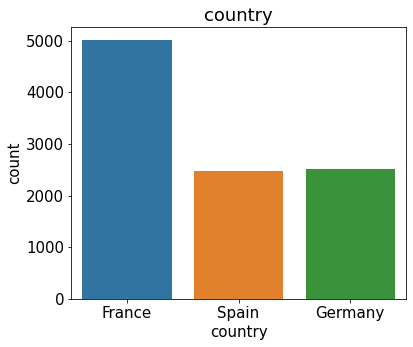

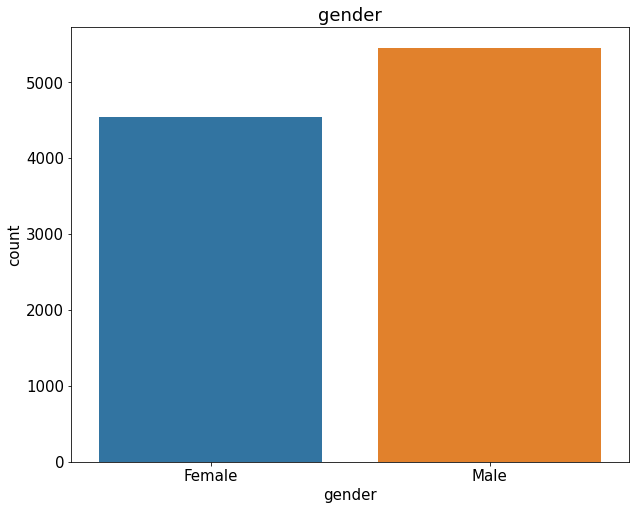

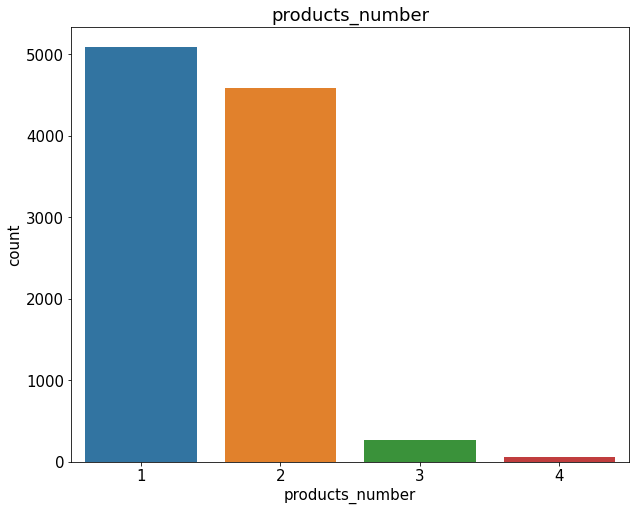

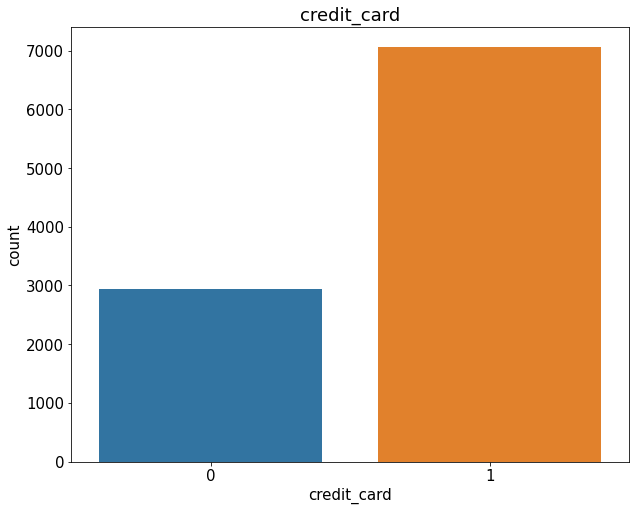

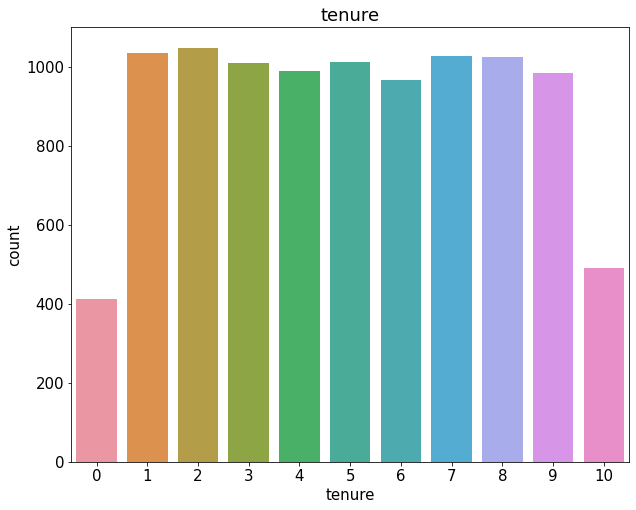

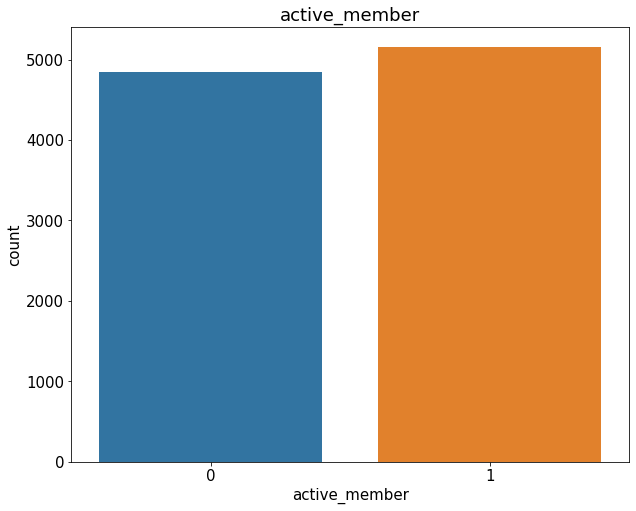

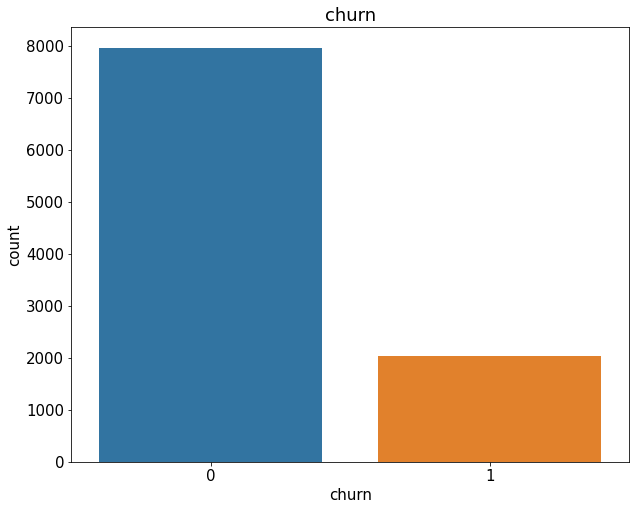

In [22]:
plt.figure(figsize=(6,5))
for i in cat_col:
    sn.countplot(x=i,data=df)
    plt.title(i)
    plt.show()

######  The major chunk of customers are French and there is more male customers than female customers. The customere show greater affinity towards the opting product 1 or 2. Tenure show equal counts across all bin.

C:\Users\vaish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vaish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vaish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

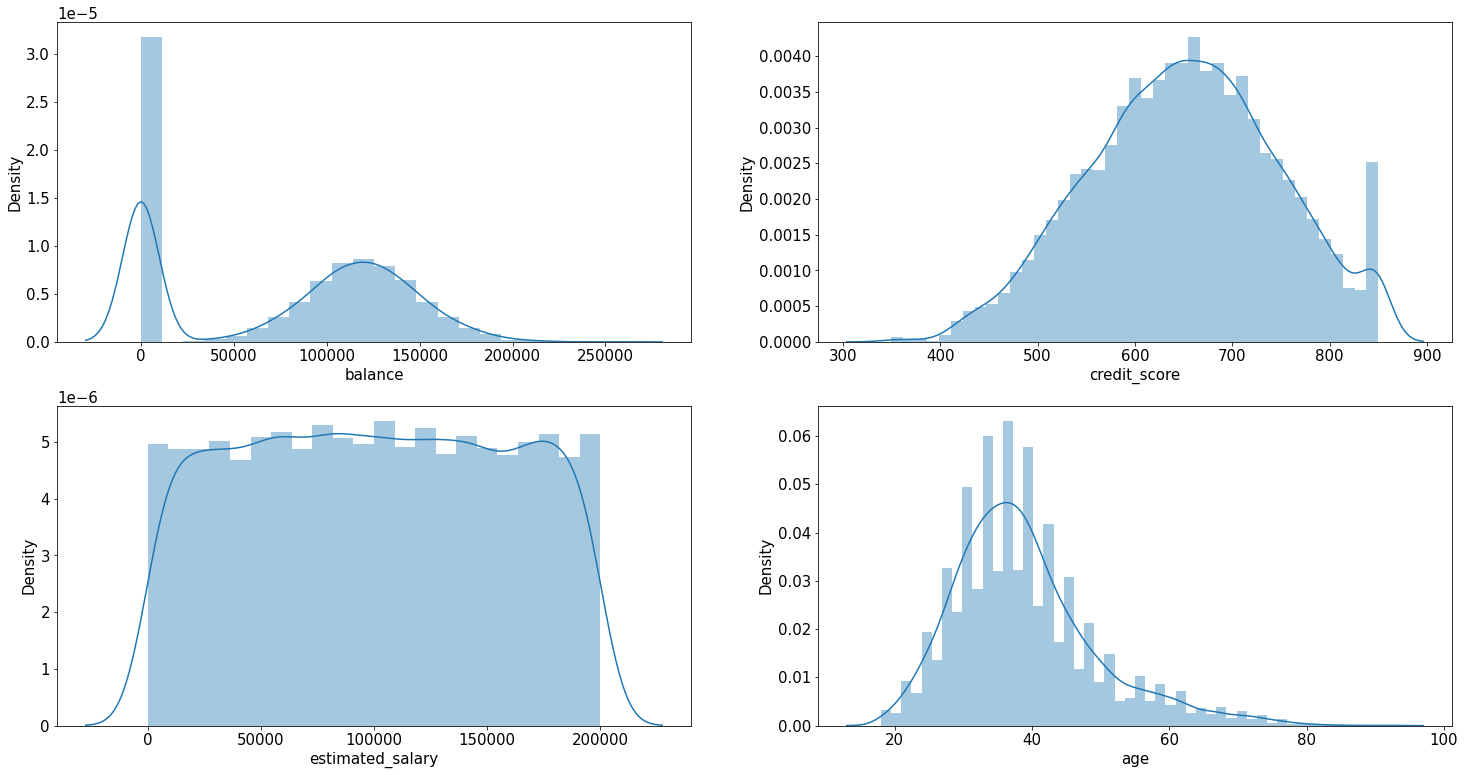

In [23]:
plt.figure(figsize=(25,20))
for i in range(len(num_col)):
    plt.subplot(3,2,i+1)
    sn.distplot(df[num_col[i]])

###### The credit score and the balance features follow a normal distribution while the age has a slight skweness towards right as most of the customers fall under the 20-40 age group. The estimated salary is almost uniformaly distributed.

#### Bi variate analysis.

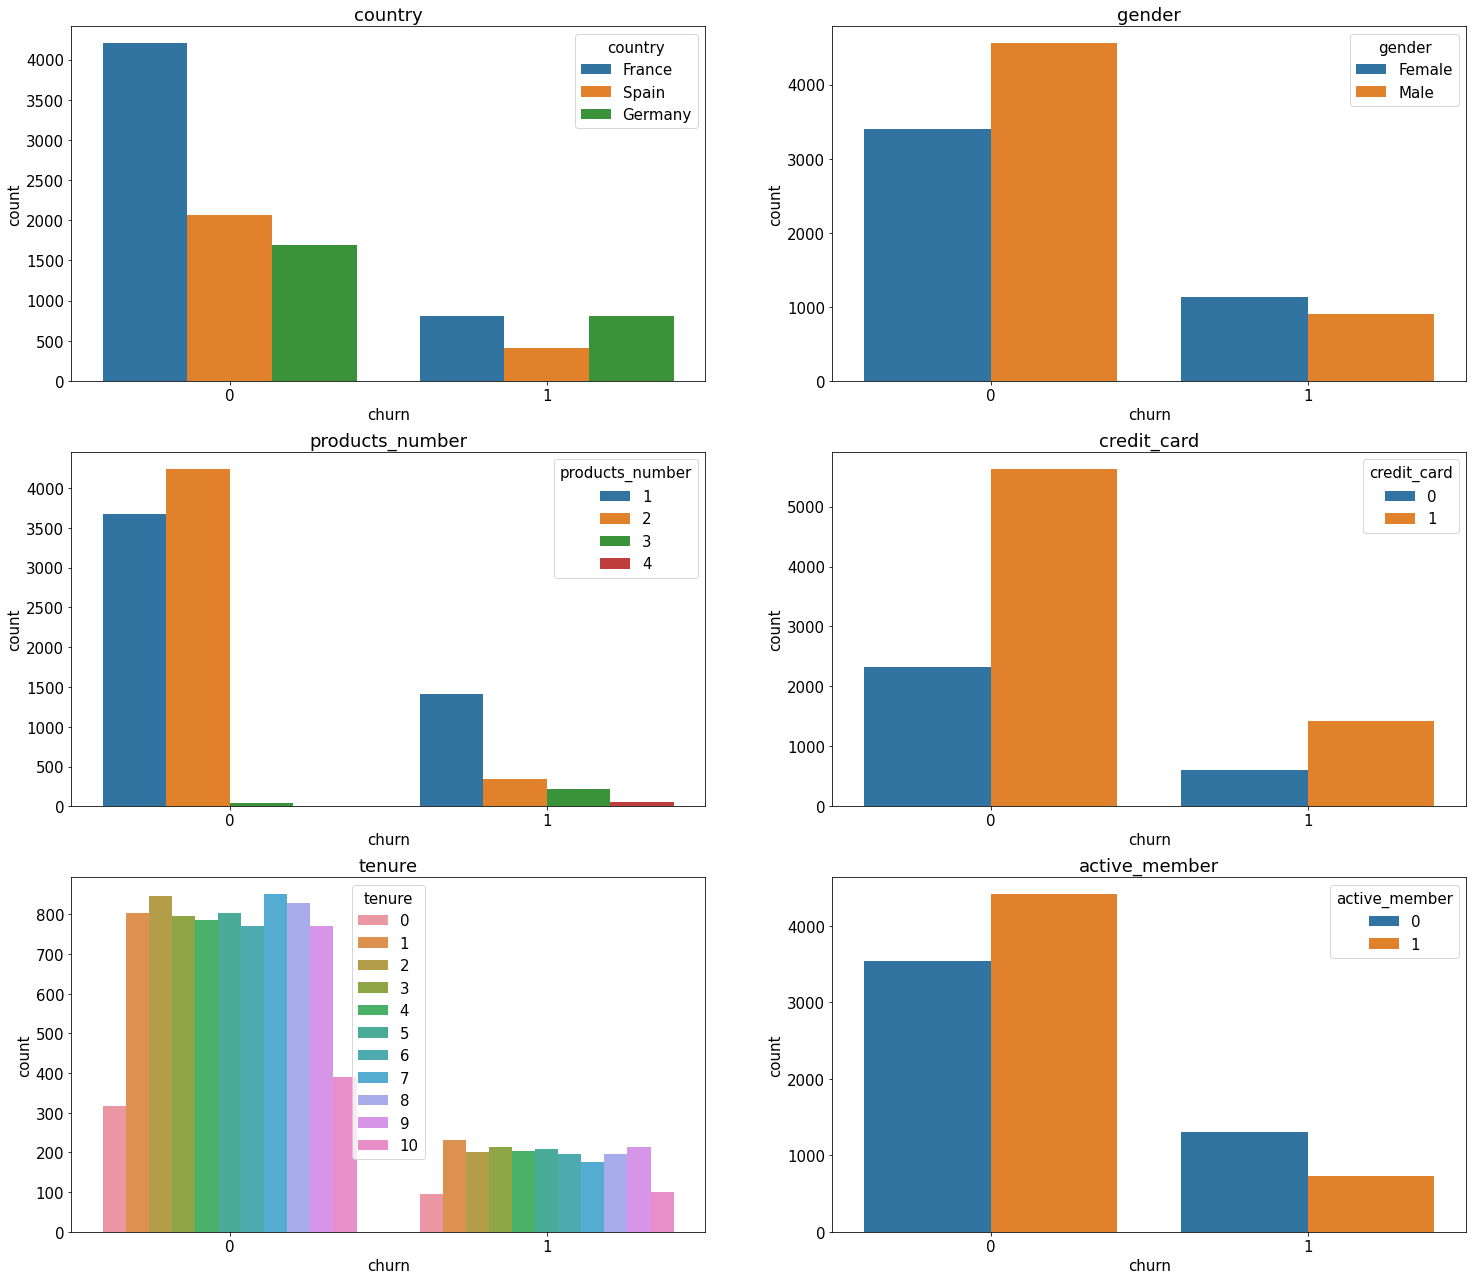

In [24]:
plt.figure(figsize=(25,30))

for i in range(len(cat_col)-1):
    plt.subplot(4,2,i+1)
    sn.countplot(hue=cat_col[i],x='churn', data=df)
    plt.title(cat_col[i])

##### Eventhough product 1 and 2 have almost similar number of customers product 2 performs well as it has lower churn rate than product 1 which reqiure attention. Those who pocess a credit card has slightly more number of churn rate. All other have similar churn rate.

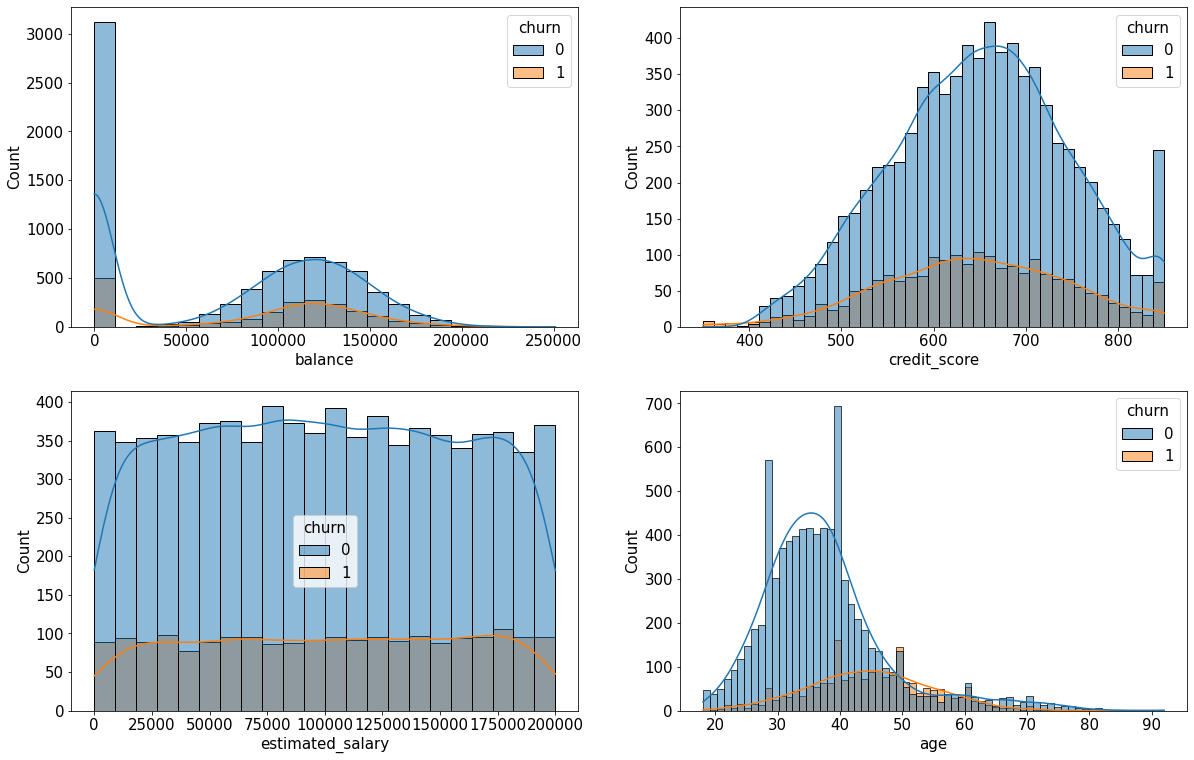

In [25]:
plt.figure(figsize=(20,20))

for col in range(len(num_col)):
    plt.subplot(3,2,col+1)
    sn.histplot(x=num_col[col],hue='churn',data=df,kde=True)

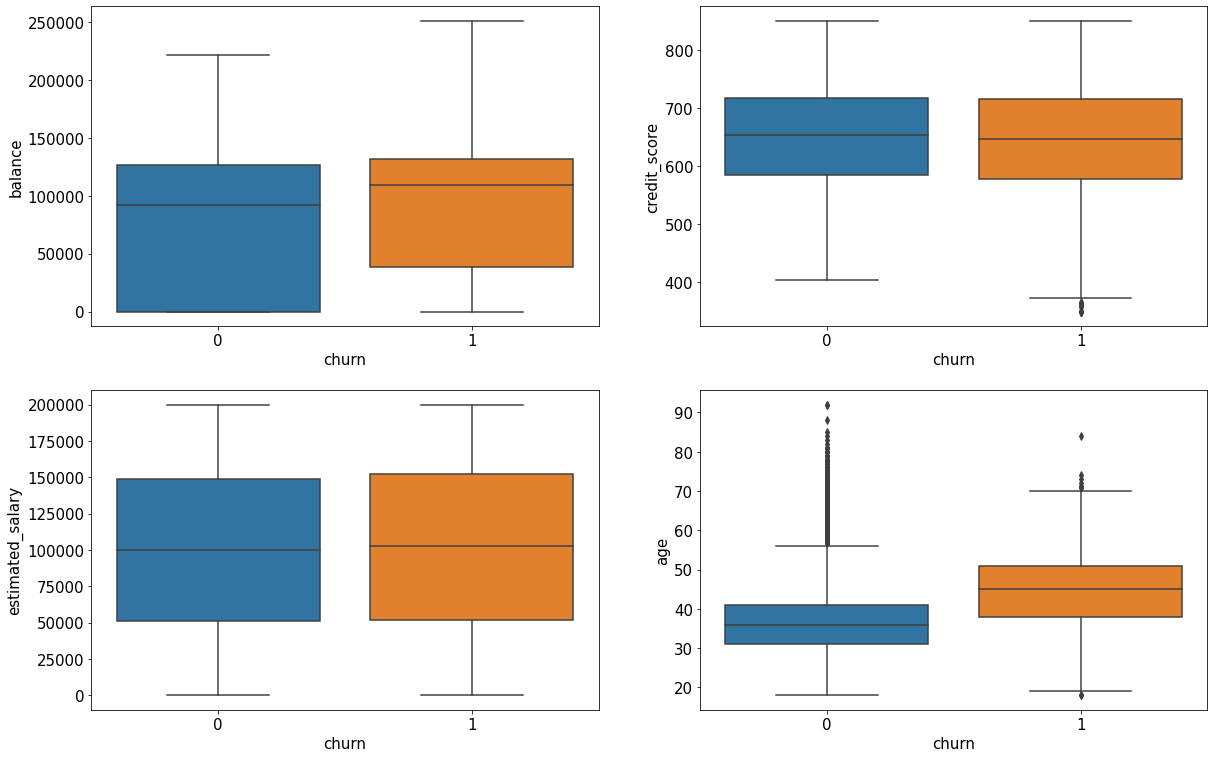

In [26]:
plt.figure(figsize=(20,20))

for col in range(len(num_col)):
    plt.subplot(3,2,col+1)
    sn.boxplot(y=num_col[col],x='churn',data=df)

###### The charts show that credit_score, balance, tenure and estimated_salary show no differences in mean with the number of customers who churn or not as the distribution of both kind of these features overlapping. 

##### Use the t-test as an inference  to assess if there is a significant difference, since the distributions follow a normal distribution and variances are unknown.
##### The t-test investigates if the difference between the groups is a genuine difference in the study or merely a chance difference.

###### Null hypothesis, H0 = There is a difference between the means of  independent feature and dependent feature.
###### Alternate Hypothesis, H1 = There is no significant difference between the means of  independent feature and dependent feature.

In [27]:
# t-test
imp_col = ['balance','tenure','age','credit_score','estimated_salary','products_number']
alpha = 0.05
for i in imp_col:
    churn_0 = df[i].loc[df['churn']==0]
    churn_1 = df[i].loc[df['churn']==1]
    t,p = ttest_ind(churn_0,churn_1,equal_var=False)
    print('p-value = {}, alpha = {}'.format(p,alpha))
    if p > alpha:
        print('p > alpha ---> Failed to reject H0, churn independed on ',i)
    else:
        print('p-value < alpha ---> Reject H0, churn depended on ',i)

p-value = {p:.2f}, alpha = {alpha:.2f}
p-value < alpha ---> Reject H0, churn depended on  balance
p-value = {p:.2f}, alpha = {alpha:.2f}
p > alpha ---> Failed to reject H0, churn independed on  tenure
p-value = {p:.2f}, alpha = {alpha:.2f}
p-value < alpha ---> Reject H0, churn depended on  age
p-value = {p:.2f}, alpha = {alpha:.2f}
p-value < alpha ---> Reject H0, churn depended on  credit_score
p-value = {p:.2f}, alpha = {alpha:.2f}
p > alpha ---> Failed to reject H0, churn independed on  estimated_salary
p-value = {p:.2f}, alpha = {alpha:.2f}
p-value < alpha ---> Reject H0, churn depended on  products_number


##### Churn is independent of Tenure and estimated salary and we can drop them from the dataframe.

In [28]:
df1 = df.drop(columns = ['tenure','estimated_salary'],axis=0)

In [29]:
df1.head()

,credit_score,country,gender,age,balance,products_number,credit_card,active_member,churn
0,619,France,Female,42,0.00,1,1,1,1
1,608,Spain,Female,41,83807.86,1,0,1,0
2,502,France,Female,42,159660.80,3,1,0,1
3,699,France,Female,39,0.00,2,0,0,0
4,850,Spain,Female,43,125510.82,1,1,1,0


In [30]:
imp_cat=['country','gender','credit_card','active_member']

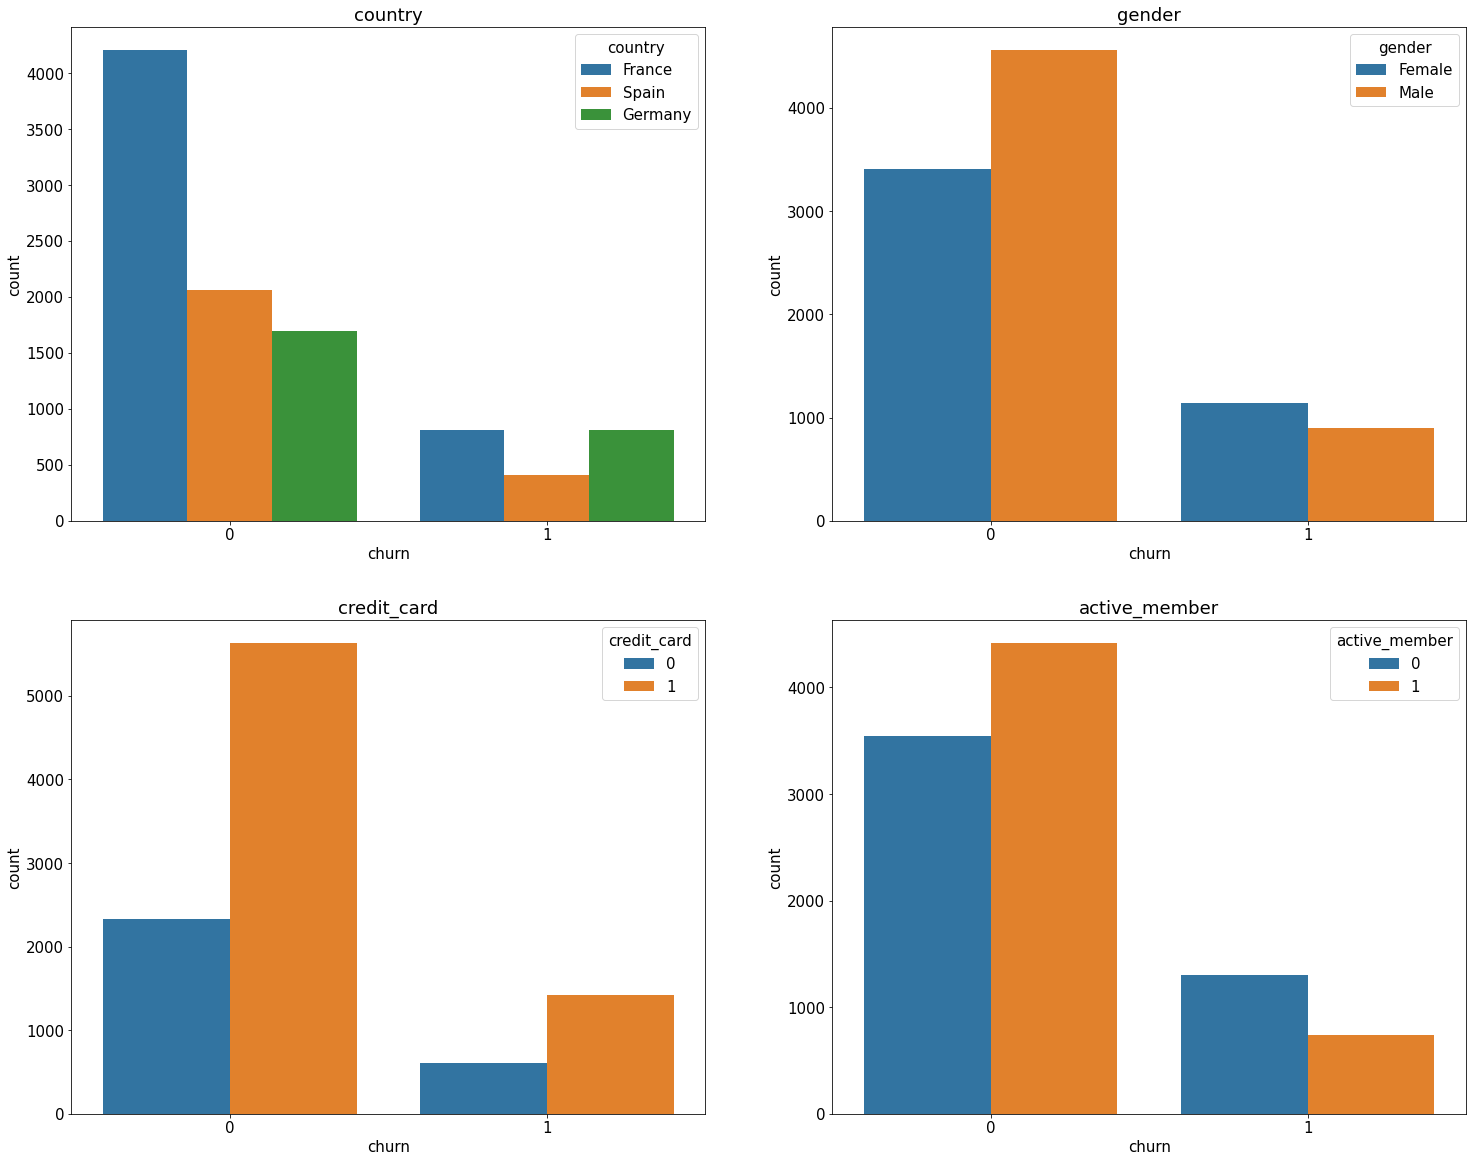

In [31]:
plt.figure(figsize=(25,20))

for i in range(len(imp_cat)):
    plt.subplot(2,2,i+1)
    sn.countplot(x='churn',hue=imp_cat[i],data=df1)
    plt.title(imp_cat[i])
plt.show()

##### Since the features are categorical the chi-square contingency test can be used to find the dependance of the independant feature with the dependant feature.

In [32]:

alpha = 0.05
for i in imp_cat:
    table = pd.crosstab(df1[i],df1['churn'])
    stat,p,dof,expected = chi2_contingency(table)
    print('p-value = {}, alpha = {}'.format(p,alpha))
    if p > alpha:
        print('p > alpha ---> Failed to reject H0, churn independed on ',i)
    else:
        print('p-value < alpha ---> Reject H0, churn depended on ',i)

p-value = {p:.2f}, alpha = {alpha:.2f}
p-value < alpha ---> Reject H0, churn depended on  country
p-value = {p:.2f}, alpha = {alpha:.2f}
p-value < alpha ---> Reject H0, churn depended on  gender
p-value = {p:.2f}, alpha = {alpha:.2f}
p > alpha ---> Failed to reject H0, churn independed on  credit_card
p-value = {p:.2f}, alpha = {alpha:.2f}
p-value < alpha ---> Reject H0, churn depended on  active_member


###### Churn is independent of whether the customer has credit card or not  and we can drop the feature.

In [33]:
df2 = df1.drop('credit_card',axis=1)

In [34]:
df2.head()

,credit_score,country,gender,age,balance,products_number,active_member,churn
0,619,France,Female,42,0.00,1,1,1
1,608,Spain,Female,41,83807.86,1,1,0
2,502,France,Female,42,159660.80,3,0,1
3,699,France,Female,39,0.00,2,0,0
4,850,Spain,Female,43,125510.82,1,1,0


In [109]:
columns = df2.columns

#### Model -Classification

In [35]:
X = df2.drop('churn',axis=1)
y = df2.churn

In [36]:
encoder = LabelEncoder()
X['gender'] = encoder.fit_transform(X['gender'])
X['country'] = encoder.fit_transform(X['country'])

In [37]:
X.head()

,credit_score,country,gender,age,balance,products_number,active_member
0,619,0,0,42,0.00,1,1
1,608,2,0,41,83807.86,1,1
2,502,0,0,42,159660.80,3,0
3,699,0,0,39,0.00,2,0
4,850,2,0,43,125510.82,1,1


In [38]:
mm_scale = MinMaxScaler()
X_scale = mm_scale.fit_transform(X)

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X_scale,y,test_size=0.2,random_state=0)

In [40]:
over_sample = RandomOverSampler()
X_train,y_train = over_sample.fit_resample(X_train,y_train)

In [184]:
 model = LogisticRegression()

score = cross_val_score(model,X_train,y_train,scoring='accuracy',cv=10)

In [185]:
score.mean()

0.6922879611691192

In [186]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7055

In [187]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7055

In [188]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1595
           1       0.38      0.72      0.50       405

    accuracy                           0.71      2000
   macro avg       0.64      0.71      0.64      2000
weighted avg       0.80      0.71      0.73      2000



In [189]:
# hyper parameter tuning

LR = LogisticRegression()
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    # 'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

}
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, scoring='accuracy', refit = True, verbose = 3, cv=5)

# fitting the model for grid search 
LR_search.fit(X_train , y_train)
LR_search.best_params_
# summarize
print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Config: %s' % LR_search.best_params_)

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.500 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solve

[CV 3/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.697 total time=   0.0s
[CV 4/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.680 total time=   0.0s
[CV 5/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.700 total time=   0.0s
[CV 1/5] END .......C=0.1, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END .......C=0.1, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END .......C=0.1, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END .......C=0.1, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END .......C=0.1, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.700 total time=   0.0s
[CV 2/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.691 total time=   0.0s
[CV 3/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.698 total time=   0.0s
[CV 4/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.676 total time=   0.0s
[CV 5/5] END ....C=0.1, p

[CV 4/5] END C=10, penalty=l1, solver=liblinear;, score=0.676 total time=   0.0s
[CV 5/5] END C=10, penalty=l1, solver=liblinear;, score=0.699 total time=   0.0s
[CV 1/5] END ........C=10, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END ........C=10, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END ........C=10, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END ........C=10, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END ........C=10, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END .....C=10, penalty=l1, solver=saga;, score=0.697 total time=   0.0s
[CV 2/5] END .....C=10, penalty=l1, solver=saga;, score=0.690 total time=   0.0s
[CV 3/5] END .....C=10, penalty=l1, solver=saga;, score=0.697 total time=   0.0s
[CV 4/5] END .....C=10, penalty=l1, solver=saga;, score=0.676 total time=   0.0s
[CV 5/5] END .....C=10, penalty=l1, solver=saga;, score=0.699 total time=   0.0s
[CV 1/5] END C=10, penalty=l

[CV 1/5] END ...C=1000, penalty=l1, solver=saga;, score=0.697 total time=   0.0s
[CV 2/5] END ...C=1000, penalty=l1, solver=saga;, score=0.690 total time=   0.0s
[CV 3/5] END ...C=1000, penalty=l1, solver=saga;, score=0.697 total time=   0.0s
[CV 4/5] END ...C=1000, penalty=l1, solver=saga;, score=0.676 total time=   0.0s
[CV 5/5] END ...C=1000, penalty=l1, solver=saga;, score=0.699 total time=   0.0s
[CV 1/5] END C=1000, penalty=l2, solver=newton-cg;, score=0.697 total time=   0.0s
[CV 2/5] END C=1000, penalty=l2, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 3/5] END C=1000, penalty=l2, solver=newton-cg;, score=0.697 total time=   0.0s
[CV 4/5] END C=1000, penalty=l2, solver=newton-cg;, score=0.676 total time=   0.0s
[CV 5/5] END C=1000, penalty=l2, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 1/5] END ..C=1000, penalty=l2, solver=lbfgs;, score=0.697 total time=   0.0s
[CV 2/5] END ..C=1000, penalty=l2, solver=lbfgs;, score=0.690 total time=   0.0s
[CV 3/5] END ..C=1

C:\Users\vaish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
105 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vaish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vaish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\vaish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Val

In [190]:
lr = LogisticRegression(C=0.1, penalty='l1', solver='saga')
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.7045

In [191]:
nbg = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
nbg_grid = GridSearchCV(estimator=nbg, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
nbg_grid.fit(X_train, y_train)

print(nbg_grid.best_params_)
print(nbg_grid.best_score_)

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'var_smoothing': 0.0006579332246575676}
0.7292713008008314


In [192]:
nbg = GaussianNB(var_smoothing= 3.511191734215127e-05)
nbg.fit(X_train,y_train)
y_pred = nbg.predict(X_test)
accuracy_score(y_test,y_pred)

0.7465

In [193]:
knc = KNeighborsClassifier()
knn_parameters = {'n_neighbors': [1, 3, 5, 7, 11],'weights':['uniform','distance'],'metric':['euclidean','manhattan']}
knn_grid = GridSearchCV(estimator=knc,param_grid=knn_parameters,cv=5,verbose=1,scoring='accuracy')
knn_grid.fit(X_train,y_train)
print(knn_grid.best_params_)
print(knn_grid.best_score_)

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.9258802950372866


In [194]:
knc = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 1, weights= 'uniform')
knc.fit(X_train,y_train)
y_pred = knc.predict(X_test)
accuracy_score(y_test,y_pred)

0.8005

In [195]:
dtc = DecisionTreeClassifier()
dtc_parameters = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dtc_grid = GridSearchCV(estimator=dtc, param_grid=dtc_parameters, cv=5,verbose=1,scoring='accuracy')
dtc_grid.fit(X_train, y_train)
print(dtc_grid.best_params_)
print(dtc_grid.best_score_)

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'criterion': 'gini', 'max_depth': 90}
0.9224254656107256


In [196]:
dtc = DecisionTreeClassifier(criterion= 'gini', max_depth= 50)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
accuracy_score(y_test,y_pred)

0.7965

In [197]:
rfc = RandomForestClassifier()
rfc_parameters = {
    'n_estimators': [200,500],
    'max_features': [.5,.7],
    'bootstrap': [False, True],
    'max_depth':[3,6]
}

rfc_grid = GridSearchCV(estimator=rfc,param_grid=rfc_parameters,cv=5,verbose=1,scoring='accuracy')
rfc_grid.fit(X_train,y_train)

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [False, True], 'max_depth': [3, 6],
                         'max_features': [0.5, 0.7],
                         'n_estimators': [200, 500]},
             scoring='accuracy', verbose=1)

In [198]:
print(rfc_grid.best_params_)
print(rfc_grid.best_score_)

{'bootstrap': True, 'max_depth': 6, 'max_features': 0.7, 'n_estimators': 500}
0.7814856521570303


In [199]:
rfc = RandomForestClassifier(bootstrap= True, max_depth= 6, max_features= 0.7, n_estimators= 500)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_test,y_pred)

0.787

In [200]:
xgbc_params = {'max_depth': [5, 6, 7], 
               'learning_rate': [0.25, 0.300000012, 0.35],
               'gamma':[0, 0.001, 0.1], 
               'reg_lambda': [0.8, 0.95, 1], 
               'scale_pos_weight': [0, 1, 2], 
               'n_estimators': [95, 100, 105]} 

xgb = XGBClassifier()
xgb_grid = GridSearchCV(xgb,xgbc_params,scoring='accuracy',cv=5,verbose=1)
xgb_grid.fit(X_train,y_train)
print(xgb_grid.best_params_)
print(xgb_grid.best_score_)

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
{'gamma': 0.1, 'learning_rate': 0.35, 'max_depth': 7, 'n_estimators': 105, 'reg_lambda': 0.8, 'scale_pos_weight': 1}
0.9222684489216544


In [201]:
xgb = XGBClassifier(gamma= 0.1, learning_rate= 0.35, max_depth= 7, n_estimators= 105, reg_lambda= 0.8, scale_pos_weight= 1)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.804

In [202]:
import pickle

In [203]:
pickle.dump(xgb_grid,open('bank_churn_classifier1.pkl','wb'))